Determine what is expected outcome of the game

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from csv
data = pd.read_csv("NBAdataõige.csv", sep=",")

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_15080\3526434771.py:2: DtypeWarning: Columns (68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NBAdataõige.csv", sep=",")


In [3]:
data.columns

Index(['game_id', 'game_date', 'OT', 'H_A', 'Team_Abbrev', 'Team_Score',
       'Team_pace', 'Team_efg_pct', 'Team_tov_pct', 'Team_orb_pct',
       'Team_ft_rate', 'Team_off_rtg', 'Inactives', 'Opponent_Abbrev',
       'Opponent_Score', 'Opponent_pace', 'Opponent_efg_pct',
       'Opponent_tov_pct', 'Opponent_orb_pct', 'Opponent_ft_rate',
       'Opponent_off_rtg', 'player', 'player_id', 'starter', 'mp', 'fg', 'fga',
       'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'did_not_play', 'is_inactive', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm',
       'season', 'minutes', 'double_double', 'triple_double', 'DKP', 'FDP',
       'SDP', 'DKP_per_minute', 'FDP_per_minute', 'SDP_per_minute',
       'pf_per_minute', 'ts', 'last_60_minutes_per_game_s

In [35]:
data.head()

,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,...,pf_per_minute,ts,last_60_minutes_per_game_starting,last_60_minutes_per_game_bench,PG%,SG%,SF%,PF%,C%,active_position_minutes
0,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.128068,17.76,NaN,NaN,0.0,0.0,47.0,51.0,3.0,NaN
1,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.032985,22.76,NaN,NaN,82.0,18.0,0.0,0.0,0.0,NaN
2,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.038986,14.00,NaN,NaN,0.0,33.0,40.0,25.0,2.0,NaN
3,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.082361,16.52,NaN,NaN,0.0,0.0,0.0,0.0,100.0,NaN
4,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.046404,6.88,NaN,NaN,0.0,0.0,2.0,33.0,65.0,NaN


In [4]:
data['game_id'].unique().shape

(2314,)

In [5]:
# Copying data into new dataset with values that are needed
df2 = pd.DataFrame([data.game_id, data.game_date, data.Team_Score, data.player, data.player_id, data.mp, data.fg_pct, data.fg3_pct, data.ft_pct, data.ast, data.stl, data.blk, data.pts, data.plus_minus]).transpose()

df2.shape

(89499, 14)

In [77]:
# A dataframe of all played games, with columns for team names and repective scores
games_data = pd.DataFrame([data.game_id, data.Team_Abbrev, data.Team_Score, data.Opponent_Abbrev, data.Opponent_Score]).T.drop_duplicates('game_id')
games_data.rename(columns = {'Team_Abbrev':'team1', 'Team_Score':'team1_score', 'Opponent_Abbrev':'team2', 'Opponent_Score':'team2_score'}, inplace = True)
games_data['home'] = games_data['game_id'].str.slice(-3,)

games_data.shape

(2314, 7)

In [80]:
games_data['won'] = games_data.team1_score > games_data.team2_score if games_data.home.equals(games_data.team1) else games_data.team1_score < games_data.team2_score

In [81]:
games_data.head()

,game_id,team1,team1_score,team2,team2_score,home,won
0,202012220BRK,GSW,99,BRK,125,BRK,True
13,202012250MIL,GSW,99,MIL,138,MIL,True
26,202012270CHI,GSW,129,CHI,128,CHI,False
38,202012290DET,GSW,116,DET,106,DET,False
50,202101010GSW,GSW,98,POR,123,GSW,True


In [8]:
games_data.shape

(2314, 6)

In [36]:
teams_data = pd.DataFrame([data.Team_Abbrev]).T.drop_duplicates('Team_Abbrev')

In [37]:
for t in teams_data['Team_Abbrev']:
    print(t)
    score1 = games_data[games_data.Team_Abbrev == t]['Team_Score'].sum()
    score2 = games_data[games_data.Opponent_Abbrev == t]['Opponent_Score'].sum()
    
    print(score1 + score2)

GSW
15311
BRK
18358
LAC
20188
LAL
18998
CHO
14685
CLE
14424
NYK
15174
IND
16953
MIA
18662
ORL
15854
WAS
17428
PHI
18063
NOP
16592
TOR
17332
MIL
20960
BOS
18830
ATL
17587
CHI
14914
SAS
16192
MEM
17293
DET
14754
MIN
15321
SAC
16116
DEN
19597
UTA
18475
POR
18244
DAL
18316
PHO
18992
OKC
16238
HOU
17607


In [38]:
teams_data['points'] = 0

for t in teams_data['Team_Abbrev']:
    score1 = games_data[games_data.Team_Abbrev == t]['Team_Score'].sum()
    score2 = games_data[games_data.Opponent_Abbrev == t]['Opponent_Score'].sum()
    
    #teams_data[teams_data.Team_Abbrev == t]['points'] == score1 + score2
    
    teams_data['points'].loc[teams_data['Team_Abbrev'] == t] = score1 + score2
    
    
print(teams_data.shape)
print(teams_data.head())

(30, 3)
   index Team_Abbrev  points
0      0         GSW   15311
1    940         BRK   18358
2   2949         LAC   20188
3   5227         LAL   18998
4   7210         CHO   14685


C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_15080\2817211541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_data['points'].loc[teams_data['Team_Abbrev'] == t] = score1 + score2


<AxesSubplot:ylabel='Team_Abbrev'>

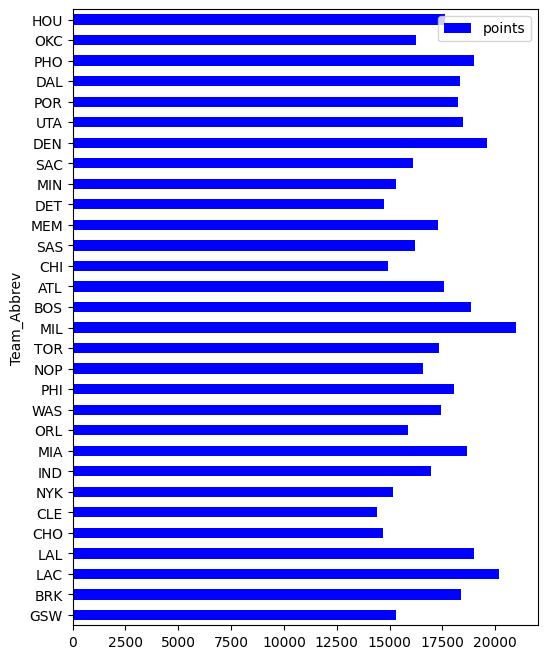

In [49]:
teams_data.plot(x='Team_Abbrev', y='points', kind='barh', color='b', figsize=(6,8))